# Predicting Language Program from Economic Index 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression
from   sklearn.model_selection import cross_val_score

In [36]:
bilingual_demographic_data= pd.read_csv("bilingual_demographic-data.csv")
bilingual_demographic_data = bilingual_demographic_data.loc[(bilingual_demographic_data["Language"] == "Spanish") | (bilingual_demographic_data["Language"] == "Chinese") | (bilingual_demographic_data["Language"] == "French")]

In [37]:
display(bilingual_demographic_data)

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2
1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2
3,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2
4,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,0.029,10,0.049,83,0.407,17,0.083,172,84.3%,84.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,General Education,P.S. /I.S. 384 Frances E. Carter,...,0.002,5,0.011,118,0.265,93,0.209,382,85.8%,90.6
243,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,Special Education,P.S. /I.S. 384 Frances E. Carter,...,0.002,5,0.011,118,0.265,93,0.209,382,85.8%,90.6
244,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education,Bushwick Leaders High School for Academic Exce...,...,0.029,4,0.012,84,0.248,92,0.271,Above 95%,Above 95%,93.4
245,Brooklyn,Brooklyn North,32,32K562,Evergreen Middle School for Urban Exploration,Junior High-Intermediate-Middle,Dual Language,Spanish,General Education,Evergreen Middle School for Urban Exploration,...,0.000,11,0.029,89,0.234,66,0.174,351,92.4%,91.8


### Cleaning the economic index 

In [48]:
# drop all schools where the economic need index of rows is above 95%  
# print(bilingual_demographic_data[bilingual_demographic_data["Economic Need Index"]=="Above 95%"])
bilingual_demographic_data.drop([4,23,28,29,61,62,63,67,71,75,80,81,82,99,165],inplace=True)
print("this is the number of rows " + str(len(bilingual_demographic_data)))

#rename economic need index 
bilingual_demographic_data = bilingual_demographic_data.rename(columns={"Economic Need Index":"economic_need_index"})

this is the number of rows 219


We dropped the schools where the economic need index is above 95% because the data displayed doesn't show the exact percentage of the economic need and we did not want to infer what percentage the economic need index of the particular school would be. 

In [18]:
#remove percent sign - converting to a float for the logistic regression and created a new column of the float values
# full_data["df_percent"] = full_data["economic_need_index"].str.rstrip('%').astype(float)
# full_data.tail()

We trained and tested over the same data. A problem with this the model might overfit and if encountered with different economic indexes, the model wouldn't provide the same results. As a result, we created a training and a testing set. 

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score

# train-test split (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(bilingual_demographic_data[["Economic Need Index"]], bilingual_demographic_data['Language'], test_size= 0.3)
print("Length of train and test sets:", len(y_train), len(y_test))

Length of train and test sets: 163 71


We have a training set of 163 and a testing set of 71. 

In [39]:
economic_model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)
economic_model.score(X_test, y_test)

0.8309859154929577

Testing on our training data, the accuracy rate of training on a randomly selected 70% of the data and scoring on the randomly selected remaining 30% is about 83%. 

### Cross Validation 

In [40]:
scores = cross_val_score(
    LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg'), 
    bilingual_demographic_data[["Economic Need Index"]], 
    bilingual_demographic_data["Language"], 
    cv=10
)

print(scores)
print(f'Mean cross-validated accuracy: {scores.mean():.3f}')

[0.79166667 0.83333333 0.79166667 0.79166667 0.86956522 0.82608696
 0.91304348 0.86956522 0.86956522 0.86956522]
Mean cross-validated accuracy: 0.843


We picked a 90% slice of the data and scored on the remaining 10% and repeated the process 10 times but using a different 90% training set every time and used the average of the scores to represent the overall prediction of the non-overfitted version of the classifier. 

The mean cross-validated accuracy is 84.3%. 

##### Baseline Accuracy 

In [41]:
num_spanish = len(bilingual_demographic_data[bilingual_demographic_data["Language"]=="Spanish"])
print('Baseline accuracy:', round(num_spanish/len(bilingual_demographic_data),3))

Baseline accuracy: 0.838


Comparing the baseline accuracy which is guessing that every language predicted is the most common language which is spanish, we would be right 83.8% of the time. Compared to the cross validation accuracy, we would be right about 84.3% of the time. We outperformed the baseline by a little bit but the baseline accuracy rate and the cross validation accuracy is basically about the same accuracy. 

To compare how accurate we predicted each language, we create a confusion matrix. 

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# true labels and predicted labels
y_true = bilingual_demographic_data['Language']
y_pred = economic_model.predict(bilingual_demographic_data[["Economic Need Index"]])

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred))

Confusion matrix
[[  0   0  26]
 [  0   1  11]
 [  0   1 195]]


/Users/tinaou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=['Chinese', 'French', 'Spanish'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


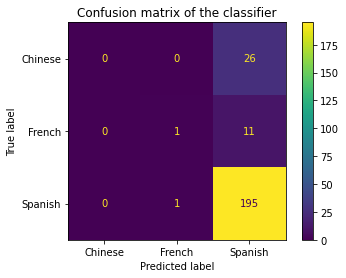

In [43]:
# visualize confusion matrix
labels = ["Chinese","French","Spanish"]
# disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=economic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), labels)
disp.plot()
plt.title("Confusion matrix of the classifier")
plt.show()

Our confusion matrix showed that the majority of the languages is indeed in fact the Spanish language and that the language that was predicted the most accurately was also Spanish. Out of the 196 schools that were Spanish, one was predicted French when in fact it should have been Spanish. For the 12 French schools, one was predicted correctly, 11 were predicted Spanish and therefore, incorrectly. Out of the 26 Chinese schools, none of them were predicted correctly and therefore yielded a 0% precision. This makes sense because our data is dominated with schools that teach Spanish and there weren't many Chinese or French schools in the first place. As a result, the model didn't have a lot of data in the first place in order to accurately predict French and Chinese. 

In [44]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Chinese       0.00      0.00      0.00        26
      French       0.50      0.08      0.14        12
     Spanish       0.84      0.99      0.91       196

    accuracy                           0.84       234
   macro avg       0.45      0.36      0.35       234
weighted avg       0.73      0.84      0.77       234



/Users/tinaou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tinaou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tinaou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our precision for language #1 which is Chinese is 0% and our recall is 0%. The precision for language #2 which is French and language #3 which is Spanish are a lot higher, 0.50 and 0.85 respectively. As a result, the overall score for French and Spanish a lot better than the score for Chinese. Overall, there is an accuracy average of 84% across all three languages. 

#f1 score is the positive predictions that were correct

tie to the research question 

#data limitations add on to it 

skewing the data with the lack of other languages 
- taking the 95% out as a limitation 
- will likely be categorized as hispanic 
- wouldn't affect the data too much 

### Another way to test the model

In [45]:
spanish_sample = full_data.loc[bilingual_demographic_data['Language'] == 'Spanish'].sample(n=8, random_state = 1)
chinese_sample = full_data.loc[bilingual_demographic_data['Language'] == 'Chinese'].sample(n=8, random_state = 1)
french_sample = full_data.loc[bilingual_demographic_data['Language'] == 'French'].sample(n=8, random_state = 1)

sample_training = spanish_sample.append(chinese_sample).append(french_sample)

economic_train = sample_training[["Economic Need Index"]]
language_train = sample_training['Language']

In [46]:
# take different samples for the X_test and y_test

# drop the schools used for the training data
training_idx = sample_training.index

# draw samples for testing data
sample_testing = full_data.drop(training_idx)
sample_testing = sample_testing.sample(frac = .75)
sample_economic_testing = sample_testing[["Economic Need Index"]]

economic_test = sample_economic_testing
language_test = sample_testing['Language']

language_model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(economic_train, language_train)
language_model.score(economic_test, language_test)

0.17721518987341772

##### Baseline Accuracy

In [47]:
print('Baseline accuracy:', round(len(spanish_sample)/len(training_idx),3))

Baseline accuracy: 0.333


The model predicted from the different samples is higher than the baseline accuracy which shows that we should use the model where we take the same number of samples from each language. 